In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty
%matplotlib inline

def plotDecisionBoundary(model, X, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.6
  resolution = 0.0025
  colors = ['royalblue','forestgreen','ghostwhite']

  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

  # Plot the test original points as well...
  for label in range(len(np.unique(y))):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

  p = model.get_params()
  plt.axis('tight')
  plt.title('K = ' + str(p['n_neighbors']))

In [2]:
# 
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
# .. your code here ..
datafile = "./Datasets/wheat.data"
X = pd.read_csv(datafile, header=0)
X.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [3]:
#
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
y = pd.DataFrame(X.wheat_type)
X = X.drop(labels=['wheat_type'], axis=1)
y

,wheat_type
0,kama
1,kama
2,kama
3,kama
4,kama
5,kama
6,kama
7,canadian
8,kama
9,kama


In [4]:
# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
# .. your code here ..
y['wheat_type'] = y.wheat_type.astype("category").cat.codes
y

,wheat_type
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,1


In [5]:
#
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
X.describe()

/Users/Jerry/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,area,perimeter,compactness,length,width,asymmetry,groove
count,210.000000,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000
mean,104.500000,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529
std,60.765944,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330
min,0.000000,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,52.250000,12.270000,13.450000,NaN,5.244750,NaN,2.600250,NaN
50%,104.500000,14.355000,14.320000,NaN,5.518000,NaN,3.599000,NaN
75%,156.750000,17.305000,15.715000,NaN,5.979750,NaN,4.768750,NaN
max,209.000000,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000


In [6]:
X.compactness = X.compactness.fillna(X.compactness.mean())
X.width = X.width.fillna(X.width.mean())
X.groove = X.groove.fillna(X.groove.mean())
X.describe()

,id,area,perimeter,compactness,length,width,asymmetry,groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,104.500000,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529
std,60.765944,2.909699,1.305959,0.023138,0.719594,0.418901,1.495112,0.527211
min,0.000000,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,52.250000,12.270000,13.450000,0.857925,5.244750,2.957000,2.600250,5.045250
50%,104.500000,14.355000,14.320000,0.873100,5.518000,3.251500,3.599000,5.247000
75%,156.750000,17.305000,15.715000,0.887325,5.979750,3.565250,4.768750,5.878500
max,209.000000,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000


In [7]:
#
# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. This is important
# so that your answers are verifiable. In the real world, you wouldn't
# specify a random_state.
#
# .. your code here ..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=1)

In [8]:
# 
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train)

Normalizer(copy=True, norm='l2')

In [9]:
#
# TODO: With your trained pre-processor, transform both your training AND
# testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has ben fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
# .. your code here ..
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

In [10]:
#
# TODO: Just like your preprocessing transformation, create a PCA
# transformation as well. Fit it against your training data, and then
# project your training and testing features into PCA space using the
# PCA model's .transform() method.
#
# NOTE: This has to be done because the only way to visualize the decision
# boundary in 2D would be if your KNN algo ran in 2D as well:
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [11]:
#
# TODO: Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure train your classifier against the pre-processed, PCA-
# transformed training data above! You do not, of course, need to transform
# your labels.
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

/Users/Jerry/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

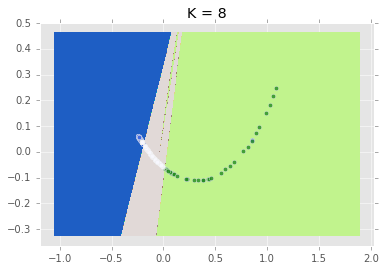

In [12]:
# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'
plotDecisionBoundary(knn, X_train, y_train)

In [13]:
#------------------------------------
#
# TODO: Display the accuracy score of your test data/labels, computed by
# your KNeighbors model.
#
# NOTE: You do NOT have to run .predict before calling .score, since
# .score will take care of running your predictions for you automatically.
#
# .. your code here ..
print knn.score(X_test, y_test)

0.9


SyntaxError: invalid syntax (<ipython-input-14-eb55608047ce>, line 1)